In [2]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

In [7]:
print('Sys: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Sys: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy: 1.15.4
Pandas: 0.23.4
Matplotlib: 3.0.2
Seaborn: 0.9.0
Scipy: 1.1.0
Sklearn: 0.20.1


In [10]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# load the dataset from the file using pandas
data = pd.read_csv("C:/Users/Venki/Desktop/training/creditcard.csv")

In [24]:
# 31 different columns, v1 to v28 these are the actuall
# result of PCA dimensionality reduction
# Time is a separation from transaction an amount
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [26]:
# 284807 credit card transaction, 31 columns, all of these transaction information
print(data.shape)

(284807, 31)


In [30]:
# it gives usefull information about each column
# it gives mean, max, count etc for each column
# See count is same for each of these parameters, which means not missing any data
# Class though is important part so wwe have 284807 these max of 1.00000 match the fraud
# min 0.00000 and mean also real close to zero
# it looks weigh more valid transactions than we do fraudulant transactions
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [31]:
# taking fraction of these dataset. 
# taking 10% of data and in random state

data = data.sample(frac=0.1, random_state=1)
print(data.shape)

(28481, 31)


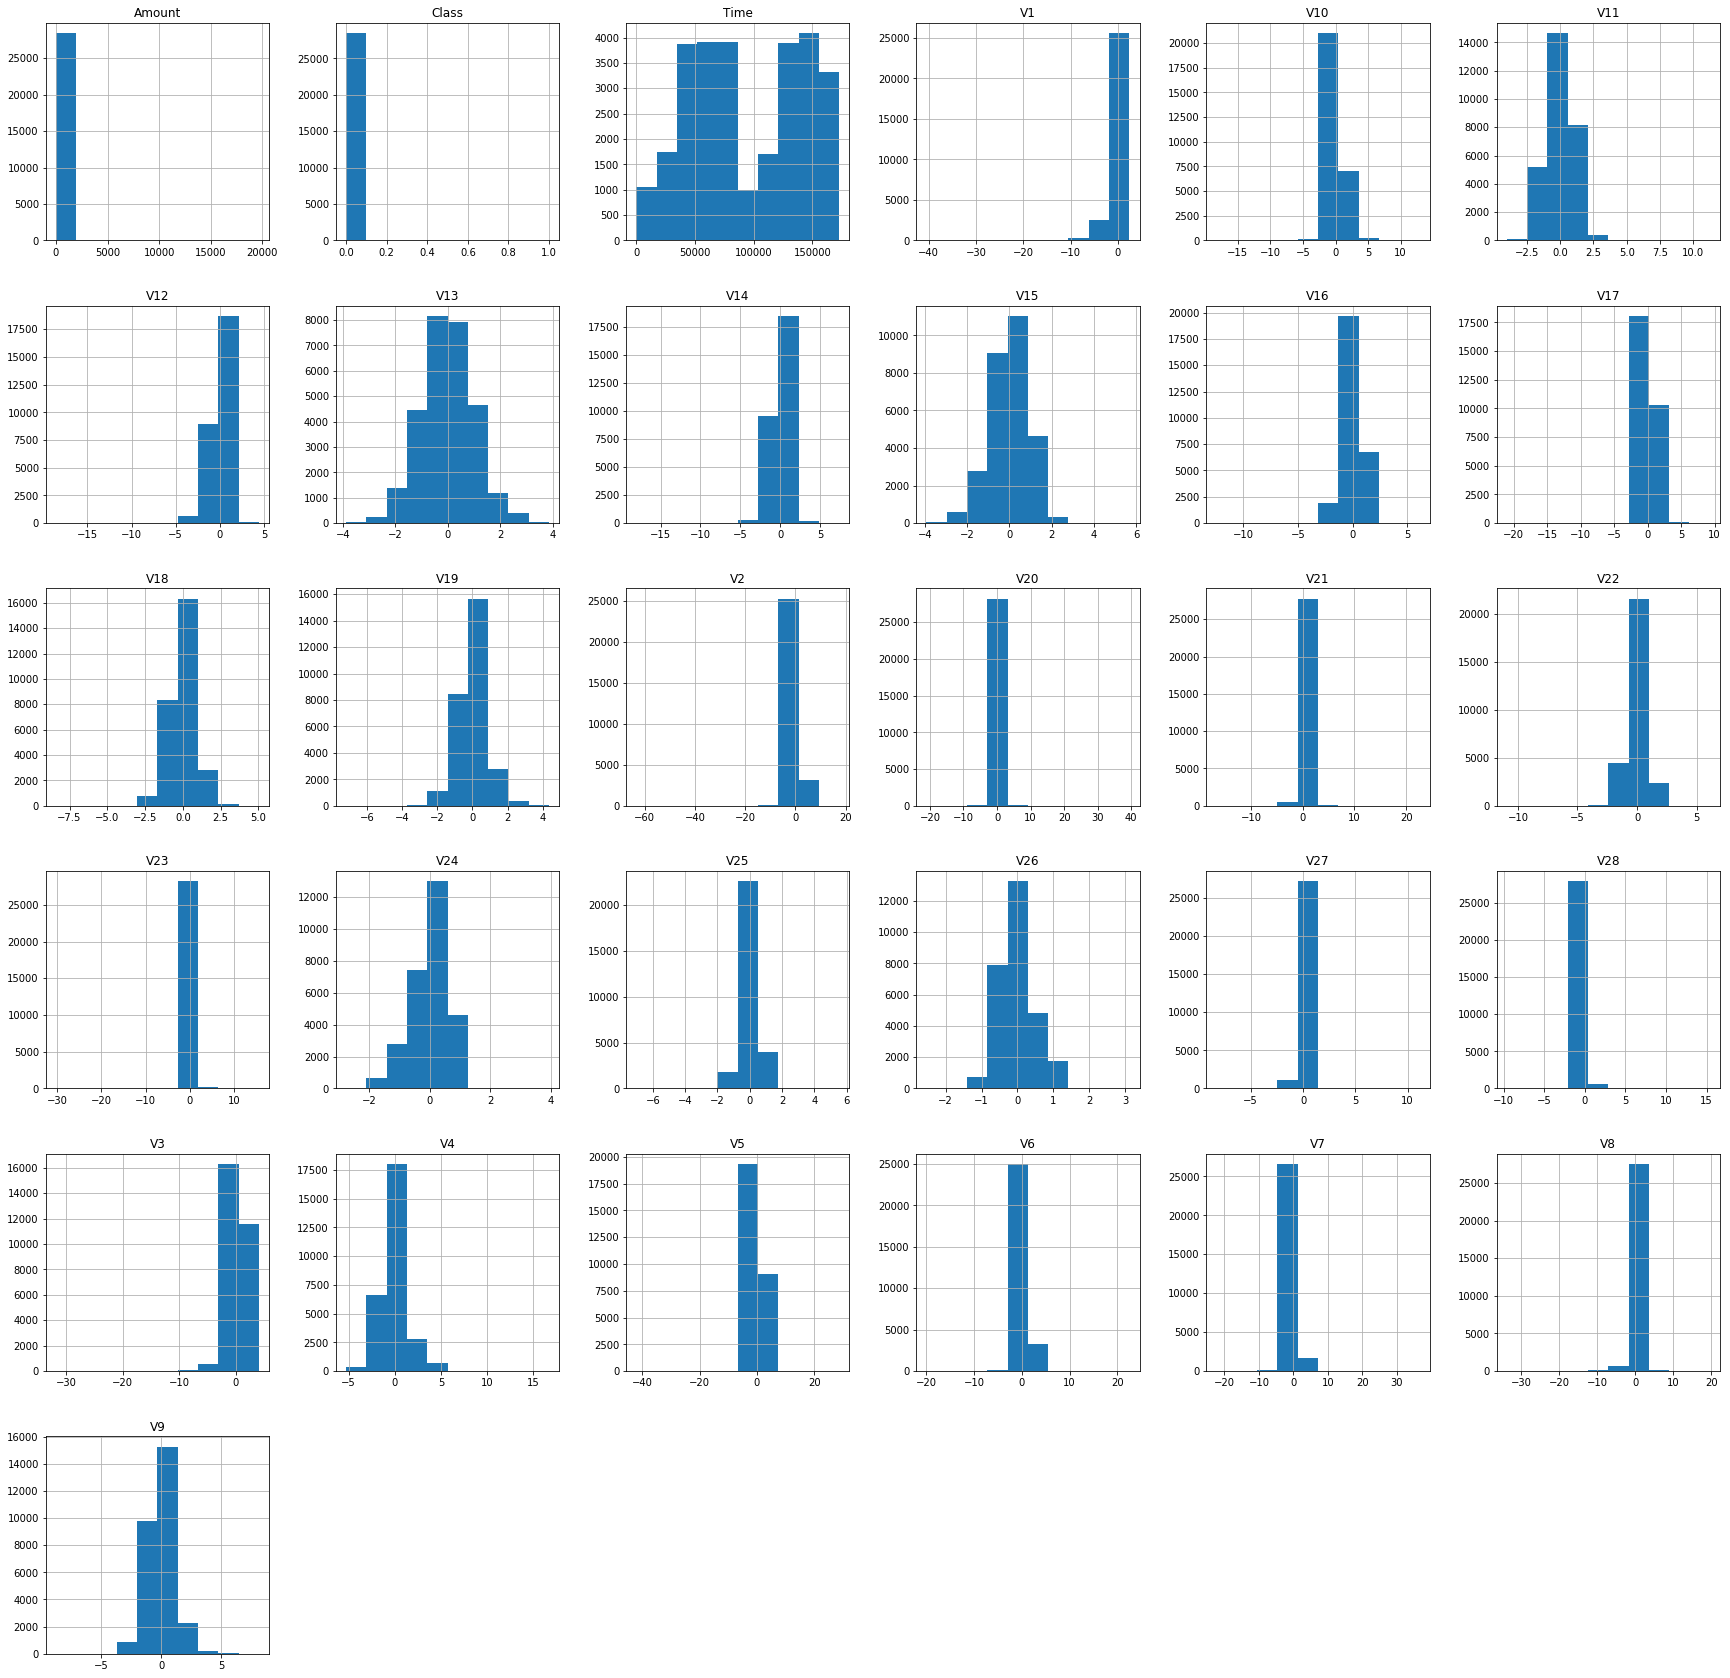

In [35]:
data.hist(figsize=(30, 30))
plt.show()

In [40]:
# to determine the number of fraqud cases in dataset
# we only have 0.17% of fradulant caes
# 49 fradulant cases
# 28432 valid cases

Fraud = data[data['Class'] == 1]
Valid = data[data['Class']==0]

outlier_fraction = len(Fraud) / float(len(Valid))

print(outlier_fraction)

print('Fraud Class: {}'.format(len(Fraud)))
print('Valid Class: {}'.format(len(Valid)))


0.0017234102419808666
Fraud Class: 49
Valid Class: 28432


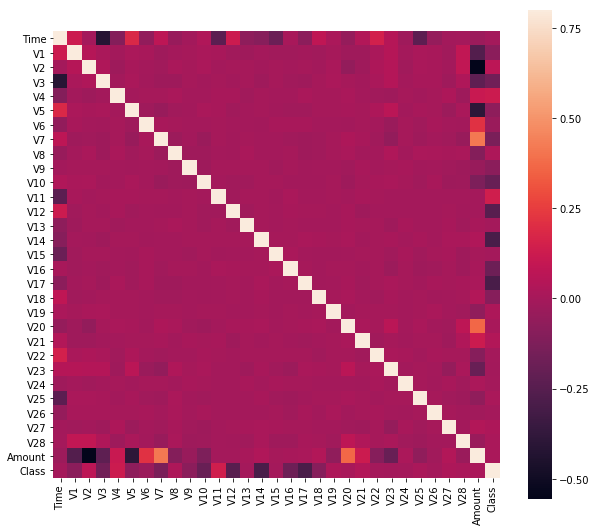

In [44]:
# correlation matrix
corrmat = data.corr()
fid = plt.figure(figsize=(10, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [45]:
# get all the columns from the dataframe
# this will generate list of the columns
# Y is one dimension
columns = data.columns.tolist()
# filter the columns to rename the data we do not want
columns = [c for c in columns if c not in ['Class']]
# store the variabale we'll be predicting on
target = 'Class'
X = data[columns]
Y = data[target]
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [47]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [48]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

C:\Users\Venki\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Venki\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 648x504 with 0 Axes>